## Preprocessing Data

In [92]:
import numpy as np
import pandas as pd
import keras

from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [93]:
general_train = pd.read_csv("./health.csv", names=["age", "health"])
shuffled_general_train = general_train.sample(frac=1)

general_test = pd.read_csv("./health_test.csv", names=["age", "health"])
shuffled_general_test = general_test.sample(frac=1)

In [94]:
train_labels, train_samples = np.array(shuffled_general_train["health"]), np.array(shuffled_general_train["age"])
test_labels, test_samples = np.array(shuffled_general_test["health"]), np.array(shuffled_general_test["age"])

In [95]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [96]:
#print scaled data
for i in scaled_train_samples:
    print(i)

[0.94252874]
[0.08045977]
[0.98850575]
[0.5862069]
[0.29885057]
[0.70114943]
[0.66666667]
[0.2183908]
[0.70114943]
[0.2183908]
[0.72413793]
[0.90804598]
[0.68965517]
[0.11494253]
[0.66666667]
[0.48275862]
[0.1954023]
[0.45977011]
[0.33333333]
[0.65517241]
[0.81609195]
[0.05747126]
[1.]
[0.27586207]
[0.1954023]
[0.7816092]
[0.89655172]
[0.94252874]
[0.86206897]
[1.]
[0.68965517]
[0.70114943]
[0.09195402]
[0.45977011]
[0.35632184]
[0.88505747]
[0.2183908]
[0.8045977]
[0.95402299]
[0.73563218]
[0.95402299]
[0.04597701]
[0.22988506]
[0.50574713]
[0.68965517]
[0.77011494]
[0.95402299]
[0.57471264]
[0.02298851]
[0.70114943]
[0.20689655]
[0.57471264]
[0.93103448]
[0.27586207]
[0.73563218]
[0.56321839]
[0.87356322]
[0.94252874]
[0.77011494]
[0.89655172]
[0.97701149]
[0.35632184]
[0.98850575]
[0.32183908]
[0.34482759]
[0.20689655]
[0.01149425]
[0.25287356]
[0.85057471]
[0.2183908]
[0.59770115]
[0.97701149]
[0.05747126]
[0.87356322]
[1.]
[0.24137931]
[0.52873563]
[0.55172414]
[0.18390805]
[0.873

[0.43678161]
[0.7816092]
[0.77011494]
[0.01149425]
[0.47126437]
[0.95402299]
[0.77011494]
[0.81609195]
[0.97701149]
[0.62068966]
[0.74712644]
[0.73563218]
[1.]
[0.01149425]
[0.75862069]
[0.26436782]
[0.35632184]
[1.]
[0.01149425]
[0.8045977]
[0.47126437]
[0.51724138]
[0.2183908]
[0.74712644]
[0.18390805]
[0.86206897]
[0.64367816]
[0.13793103]
[0.48275862]
[0.89655172]
[0.73563218]
[0.56321839]
[0.57471264]
[0.4137931]
[0.2183908]
[0.63218391]
[0.71264368]
[0.56321839]
[0.49425287]
[0.27586207]
[0.49425287]
[0.13793103]
[0.72413793]
[0.36781609]
[0.8045977]
[0.05747126]
[0.59770115]
[0.89655172]
[0.85057471]
[0.42528736]
[0.49425287]
[0.66666667]
[0.10344828]
[0.1954023]
[0.64367816]
[0.79310345]
[0.59770115]
[0.44827586]
[0.89655172]
[0.28735632]
[0.70114943]
[0.73563218]
[0.57471264]
[0.62068966]
[0.95402299]
[0.26436782]
[0.91954023]
[0.7816092]
[0.74712644]
[0.49425287]
[0.63218391]
[0.]
[0.6091954]
[0.36781609]
[0.50574713]
[0.13793103]
[0.93103448]
[0.97701149]
[0.08045977]
[0.011

## Simple Sequential Model


In [97]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [98]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                32        
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.compile(Adam(learning_rate=.0003), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
189/189 - 1s - loss: 0.6281 - accuracy: 0.6048 - val_loss: 0.5727 - val_accuracy: 0.7524 - 1s/epoch - 6ms/step
Epoch 2/20
189/189 - 0s - loss: 0.5387 - accuracy: 0.7598 - val_loss: 0.4711 - val_accuracy: 0.8429 - 385ms/epoch - 2ms/step
Epoch 3/20
189/189 - 0s - loss: 0.4474 - accuracy: 0.8444 - val_loss: 0.3790 - val_accuracy: 0.8714 - 382ms/epoch - 2ms/step
Epoch 4/20
189/189 - 0s - loss: 0.3712 - accuracy: 0.8942 - val_loss: 0.3092 - val_accuracy: 0.9143 - 416ms/epoch - 2ms/step
Epoch 5/20
189/189 - 0s - loss: 0.3218 - accuracy: 0.9164 - val_loss: 0.2660 - val_accuracy: 0.9238 - 399ms/epoch - 2ms/step
Epoch 6/20
189/189 - 0s - loss: 0.2926 - accuracy: 0.9265 - val_loss: 0.2416 - val_accuracy: 0.9286 - 384ms/epoch - 2ms/step
Epoch 7/20
189/189 - 0s - loss: 0.2758 - accuracy: 0.9344 - val_loss: 0.2268 - val_accuracy: 0.9333 - 401ms/epoch - 2ms/step
Epoch 8/20
189/189 - 0s - loss: 0.2656 - accuracy: 0.9344 - val_loss: 0.2158 - val_accuracy: 0.9333 - 398ms/epoch - 2ms/step
Epo

## Preprocess Test Data

In [101]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

## Predict

In [102]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

In [103]:
for i in predictions:
    print(i)

[0.971221   0.02877892]
[0.20797232 0.7920277 ]
[0.07860449 0.92139554]
[0.92921466 0.07078534]
[0.96908194 0.03091801]
[0.14140147 0.85859853]
[0.50195056 0.49804944]
[0.15524122 0.8447588 ]
[0.7945864  0.20541352]
[0.7945864  0.20541352]
[0.04715706 0.9528429 ]
[0.97142315 0.02857683]
[0.97142315 0.02857683]
[0.39161488 0.60838515]
[0.9670396  0.03296039]
[0.9699791  0.03002087]
[0.96606624 0.03393381]
[0.08692014 0.91307986]
[0.85828614 0.14171389]
[0.9713595  0.02864051]
[0.29134506 0.70865494]
[0.02825818 0.97174186]
[0.05217246 0.9478275 ]
[0.20797232 0.7920277 ]
[0.71186626 0.28813374]
[0.9511124  0.04888761]
[0.9713595  0.02864051]
[0.9715237  0.02847631]
[0.0122671 0.9877329]
[0.11681407 0.883186  ]
[0.95655143 0.04344856]
[0.02825818 0.97174186]
[0.04715706 0.9528429 ]
[0.9713595  0.02864051]
[0.05217246 0.9478275 ]
[0.971221   0.02877892]
[0.9360935  0.06390657]
[0.17352176 0.82647824]
[0.05217246 0.9478275 ]
[0.39161488 0.60838515]
[0.9670396  0.03296039]
[0.29134506 0.7086

In [104]:
rounded_predictions = np.argmax(model.predict(scaled_test_samples, batch_size=10, verbose=0), axis=1 )

In [105]:
for i in rounded_predictions:
    print(i)

0
1
1
0
0
1
0
1
0
0
1
0
0
1
0
0
0
1
0
0
1
1
1
1
0
0
0
0
1
1
0
1
1
0
1
0
0
1
1
1
0
1
0
1
0
0
0
1
0
0
0
0
0
1
1
1
0
1
1
1
0
0
1
0
1
0
1
0
0
1
1
0
0
1
0
1
1
0
1
0
0
0
0
1
0
1
1
1
0
1
0
1
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
0
1
0
0
0
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
1
0
0
0
0
1
1
1
0
0
0
0
1
1
1
0
1
1
1
0
0
1
0
1
1
0
0
1
0
0
0
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
1
0
1
1
1
1
1
1
0
1
1
0
0
1
0
0
0
0
1
1
1
1
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
0
0
0
1
1
0
0
0
0
0
0
0
1
1
0
1
0
1
0
0
0
0
1
1
0
0
0
1
1
0
0
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
1
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
1
0
0
0
1
1
1
1
0
1
1
1
1
0
0
0
1
1
1
0
0
1
1
0
0
1
0
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
1
0
0
0
0
1
1
1
0
0
1
1
1
0
0
1
0
1
0
1


## Confusion Matrix

In [106]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [107]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


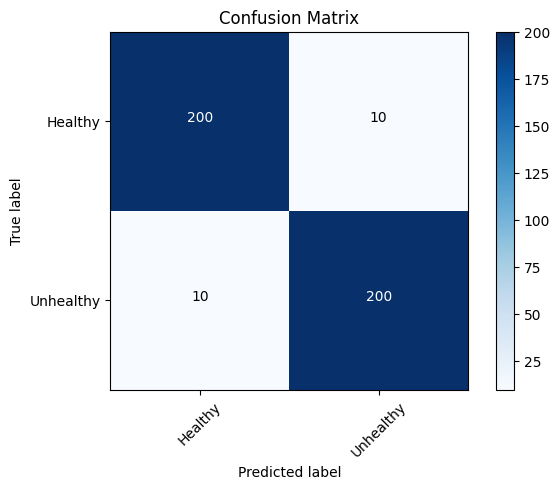

In [108]:
cm_plot_labels = ['Healthy','Unhealthy']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')